<h1 style="text-align:center">Module 6 Assessment</h1>

Welcome to your Mod 6 Assessment. You will be tested for your understanding on concepts and ability to programmatically solve problems that have been covered in class and in the curriculum. Topics in this assessment include graph theory, natural language processing, and neural networks. 

You will have up to 90 minutes to complete this assessment. 

## Natural Language Processing Assessment

In this exercise we will attempt to classify text messages as "SPAM" or "HAM" using TF-IDF Vectorization. Complete the functions below and answer the question(s) at the end. 

Import necessary libraries (we've imported some for you)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

Read in data

In [ ]:
df_messages = pd.read_csv('data/spam.csv', usecols=[0,1])

Convert string labels to 1 or 0 

In [ ]:
le = LabelEncoder()
df_messages['target'] = le.fit_transform(df_messages['v1'])

### Tokenize

##### 1) Create a function that takes in a string and returns a list of tokens or words

In [ ]:
def tokenize(string):
    '''
    Tokenizes a string
    
    Parameters
    ----------
    string: str object
        String object to tokenize
    Returns
    --------
    tokens : list
        A list containing each word in string as an element 

    '''
    pass

### Remove Stopwords

##### 2) Create a function to remove stopwords and punctuation from a list of tokens

In [ ]:
def remove_stopwords(tokens): 
    '''
    Removes stopwords from a list of tokens (words)
    
    Parameters
    ----------
    tokens: list object
        List of tokens that need stopwords removed
    Returns
    --------
    stopwords_removed : list object
        A list containing tokens with stopwords removed

    '''
    pass

Apply tokenization and stop word removal to our dataset 

In [ ]:
df_messages['tokens'] = df_messages['v2'].apply(lambda x: tokenize(x))
df_messages['stopwords_removed'] = df_messages['tokens'].apply(lambda x: remove_stopwords(x))

### Most Common Words

##### 3) Create a function that outputs the frequency of the n most common words

In [ ]:
def frequency_distribution(tokens, n):
    '''
    Get n most common words in a Series of tokens
    
    Parameters
    ----------
    tokens: pandas.Series object
        Pandas series of tokens 
    n : int object
        Integer defining the number of most common words to return
    Returns
    --------
    most_common : list object
        An array of tuples containing word frequency for n most common words

    '''
    pass

In [ ]:
frequency_distribution(df_messages['stopwords_removed'], 10)

### TF-IDF

##### 4) Generate tf-idf vectorization for our data (split data into train and test here)

In [ ]:
def tfidf(X, y): 
    '''
    Generate train and test TF-IDF vectorization for our data set
    
    Parameters
    ----------
    X: pandas.Series object
        Pandas series of text documents to classify 
    y : pandas.Series object
        Pandas series containing label for each document
    Returns
    --------
    tf_idf_train :  sparse matrix, [n_train_samples, n_features]
        Vector representation of train data
    tf_idf_test :  sparse matrix, [n_test_samples, n_features]
        Vector representation of test data
    y_train : array-like object
        labels for training data
    y_test : array-like object
        labels for testing data
    vectorizer : vectorizer object
        fit TF-IDF vecotrizer object

    '''
    
    pass


Run tfidf()

In [ ]:
tf_idf_train, tf_idf_test, y_train, y_test, vecotorizer = tfidf(df_messages['v2'], df_messages['target'])

### Classification

Initialize classifiers

In [ ]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

##### 5) Create a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions

In [ ]:
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    '''
    Train a classifier to identify whether a message is spam or ham
    
    Parameters
    ----------
    classifier: sklearn classifier
       initialized sklearn classifier (MultinomialNB, RandomForestClassifier, etc.)
    tf_idf_train : sparse matrix, [n_train_samples, n_features]
        TF-IDF vectorization of train data
    tf_idf_test : sparse matrix, [n_test_samples, n_features]
        TF-IDF vectorization of test data
    y_train : pandas.Series object
        Pandas series containing label for each document in the train set
    Returns
    --------
    train_preds :  list object
        Predictions for train data
    test_preds :  list object
        Predictions for test data
    '''
    pass

Generate predictions for Naive Bayes Classifier

In [ ]:
nb_train_preds, nb_test_preds = classify_text(nb_classifier,tf_idf_train, tf_idf_test, y_train)

In [ ]:
print(confusion_matrix(y_test, nb_test_preds))
print(accuracy_score(y_test, nb_test_preds))


Generate predictions for Random Forest Classifier

In [ ]:
rf_train_preds, rf_test_preds = classify_text(rf_classifier,tf_idf_train, tf_idf_test, y_train)

In [ ]:
print(confusion_matrix(y_test, rf_test_preds))
print(accuracy_score(y_test, rf_test_preds))

This function returns the word with the highest TF-IDF value in a given documnet

In [ ]:
def get_max_tf_idf(tf_idf, doc):
    '''
    Get word with highest TF-IDF value in a document
    
    Parameters
    ----------
    tf_idf : spare matrix 
        TF-IDF vectorization of text data
    doc : int object
        Index of document in vectorization to get max tf-idf for
    --------
    max_tf_idf : str object
        Word with highest TF-IDF value in a document
    '''
    x = tf_idf[doc].toarray()
    max_tf_idf = vecotorizer.get_feature_names()[np.where(x[0] == max(x[0]))[0][0]]
    return max_tf_idf

### Explain

##### 6) The word schools has the highest TF-IDF value in the second document of our test data. What does that tell us about the word school? 


In [ ]:
get_max_tf_idf(tf_idf_test, 1)

// write stuff //

## Network Analysis Assessment

For these next questions, you'll be using a graph dataset of facebook users and networkx. In the next cell, we're going to read in the dataset.

In [31]:
import networkx as nx
G = nx.read_edgelist('./data/0.edges')

###### 1) Create a function `find_centrality` that returns a dictionary with the user with the highest betweenness centrality and the user with the highest degree centrality. It should return a dictionary that looks like:


{'bc' : |user|, 'dc' : |user|}

How does each of these people wield influence on the network? Imagine a message had to get to people from different communities. Who would be the best user to deliver the message to ensure that people from opposite communities receive the message?

In [32]:
def find_centrality(graph):
    """
    Calculates the most central nodes on a graph
    
    Parameters
    ----------
    graph: networkx Graph object
        Graph object to be analyzed
    Returns
    --------
    centrality_dict : dict
        A dictionary with the highest ranked user based off degree centrality and betweenness centrality 
    """
    pass

// write stuff //

##### 2) A marketing group is looking to target different communities with advertisements based off of their assumed mutual interests. Use the k_cliques_communities method to calculate the number of cliques formed with k users in a function `find_k_communities`. Calculate how many communities there are if the minimum size of a clique is 5.


In [34]:
def find_k_communities(graph,k):
    """
    Parameters
    ----------
    graph: networkx Graph object
        
    k : int
        k-number of connections required for a clique
    
    Returns
    -------
    num_communities: int
        The number of communities present in the graph
    """
    pass

## Neural Network Assessment 

You will need the following libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets import make_gaussian_quantiles, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import Sequential, regularizers
from keras.layers import Dense
from keras.initializers import RandomNormal

ModuleNotFoundError: No module named 'keras'

<center><b>The Sigmoid Function</b></center>
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

##### 1) Given inputs and weights 1 through l and the sigmoid function (given above), write a function which computes the output y. Assume bias = 1.

In [35]:
def sigmoid(input_function):
    """
    Transforms an input using the sigmoid function given above
    
    Parameters
    ----------
    input_function: function or numeric input to be transformed
    
    Returns
    --------
    output : float
        result of the application of the sigmoid function 
    """
    
    pass

In [36]:
def perceptron_output(x,w,b=1):
    """
    Caluclates the perceptron output. Should use sigmoid as a helper function.
    
    Parameters
    ----------
    x : np.array
        perceptron inputs
    w : np.array
        perceptron input weights
    b : float
        bias term
    
    Returns
    --------
    y : float
        final output of the perceptron
    """
    
    pass

##### 2) How does this relate to logistic regression?

// write stuff //

##### 3) Name two other activation functions and write functions for them as done with the sigmoid in part 1

// write stuff //

### Multilayer Perceptron

<img src='images/Deeper_network_day2.png'/>

##### Forward propagation

$ Z^{[l]}= W^{[l]} A^{[l-1]} + b^{[l]}$

$ A^{[l]}= g^{[l]} ( Z^{[l]})$

##### Back-propagation
$ dZ^{[l]}= dA ^{[l]} * g^{[l]'} (Z^{[l]})$

$ dW^{[l]} = \dfrac{1}{m} dZ^{[l]}* A^{[l-1]T}$

$ db^{[l]} = \dfrac{1}{m} np.sum(dZ^{[l]}, axis=1, keepdims=True)$

$ dA^{[l-1]} = W^{[l]T}*dZ^{[l]}$

##### 4) Describe the process of forward propagation in neural networks

// write stuff //

##### 5) How does what happens in forward-propagation change what happens in back-propagation? Be as specific as possible.

// write stuff //

##### 6) Why is the chain rule important for backpropagation?

// write stuff //

##### 7) You are training a neural network to pick out particular sounds in a dataset of audio files. Assume all preprocessing has already been done. If there are several sounds in each mp3 file, how would you modify your output layer to identify whether a particular sound occurs? How does your interpretation change assuming more than one sound can be in each file?

// write stuff //

### Regularization and Optimization of Neural Networks

These datasets are created using SKLearn, and should be improved. Although changing the number of nodes and layers may improve the models, focus on regularization in the first dataset, and gradient descent in the second.

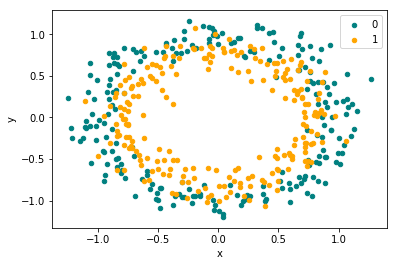

In [2]:
np.random.seed(0)
# generate 2d classification dataset
X, y = make_circles(n_samples=450, noise=0.12)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'teal', 1:'orange'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key != 2:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Regularization: The following model is over-fit. Modify the following code to address the discrepancy between train and test accuracy.m

In [3]:
#train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### 8) Modify the code below to use L2 regularization


Your code goes in the cell below. Try running once without regularization first and look at what happens to train and test accuracy.

Hint: use the activity_regularizer parameter in both of the hidden layers.

In [ ]:
random.seed(0)

#Instantiate Classifier
classifier = Sequential()

#Hidden Layer
classifier.add(Dense(
    32, 
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',

))

#Hidden Layer
classifier.add(Dense(
    32,
    activation='relu', 
    input_dim=2,
    kernel_initializer='random_normal',

))

#Output Layer
classifier.add(Dense(
    1, 
    activation='sigmoid',
    kernel_initializer='random_uniform',
))

classifier.compile(optimizer ='adam',loss="binary_crossentropy",metrics =['accuracy'])

classifier.fit(X_train, y_train, epochs=25, verbose=0, batch_size=10, shuffle=False)

Look what happens to train and test accuracy as you modify the model

In [ ]:
# TRAIN

#predict classes
predicted_vals_train = classifier.predict_classes(X_train)
#show accuracy score
print(accuracy_score(y_train,predicted_vals_train))

In [ ]:

# TEST

#predict classess
predicted_vals_test = classifier.predict_classes(X_test)
#show accuracy score
print(accuracy_score(y_test,predicted_vals_test))

##### 9) Explain what you did and how it changed the train and test accuracy

// write stuff // 

##### 10) Explain what regularization does, and how it affects the final weights of a model.

// write stuff //

##### 11) How does L1 regularization change a neural network's architecture?

// write stuff //

### Optimization with Gradient Descent

A 3 dimensional dataset is generated using SKlearn and a poorly fit neural network is fit to it. Try improving the model using what's available through Keras, and then explain what you did in part 5.

<img src='images/data.png' width="50%"/>

Generate 3d data with complex error surface for MLP

In [ ]:
np.random.seed(0)
# Construct dataset
# Gaussian 1
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=10000, n_features=3,
                                 n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y','z'])
y1 = pd.Series(y1)

# Gaussian 2
X2, y2 = make_gaussian_quantiles(mean=(4, 4,2), cov=1,
                                 n_samples=5000, n_features=3,
                                 n_classes=2, random_state=2)
X2 = pd.DataFrame(X2,columns=['x','y','z'])
y2 = pd.Series(y2)
# Combine the gaussians
X1.shape
X2.shape
X = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))

##### 12) Modify the code below to improve the starter model

Hint: use help(Dense) to see what parameters you can change. You should be able to explain how these parameters relate to gradient descent. Don't worry too much about overfitting in this example, just focus on gradient descent.

In [ ]:
#keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='zero', input_dim=3))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='zero'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='zero'))

In [ ]:
#Compiling the neural network, and specifying to measure accuracy at each step
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [6]:
#Fitting the neural network
classifier.fit(X,y, batch_size=10, epochs=100,verbose=1)

NameError: name 'classifier' is not defined

##### 13) Explain why modifying the gradient descent process does anything and how it works.

// write stuff //